# Projet 5: Optimisez la gestion des données d'une boutique

## 1. Importation des packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 2. Imporation des fichiers xlsx 

In [2]:
erp = pd.read_excel('erp.xlsx')
web = pd.read_excel('web.xlsx')
liaison = pd.read_excel('liaison.xlsx')

## 3. Exploration et nettoyage des DataFrames
### 3.1 Exploration et nettoyage du DataFrame ERP

In [3]:
erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [4]:
erp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


In [5]:
# Je vérifie s'il existe des doublons dans la serie 'product_id' autrement dit je vérifie l'unicité de la clé primaire
erp['product_id'].duplicated().sum()

0

In [6]:
# J'affiche le nombre de valeurs manquantes par serie
erp.isnull().sum()

product_id        0
onsale_web        0
price             0
stock_quantity    0
stock_status      0
dtype: int64

In [7]:
erp.shape

(825, 5)

#### Le DataFrame erp contient 5 varibles et 825 individus et ne contient pas de valeurs manquantes.                                               Après vérification, il n'y'a pas de doublon dans la variable 'product_id', cela garantie l'unicité de la clé primaire. Je peux donc l'utiliser comme clé de jointure pour relier le DataFrame erp au DataFrame Liaison.

### 3.2 Exploration et nettoyage du DataFrame Web

In [8]:
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [9]:
# Je renomme la variable sku du df web
web = web.rename(columns= {'sku': 'web_id'})

In [10]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   web_id                 1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object        
 13  pos

In [11]:
web.shape

(1513, 28)

In [12]:
# Je vérifie s'il existe des doublons dans la serie 'web_id' autrement dit je vérifie l'unicité de la clé primaire
web['web_id'].duplicated().sum()

798

In [13]:
# J'affiche quelques doublons pour savoir sur quel critère je garde l'un des deux individus en double
# exemple 1
web[web['web_id'] == 15300]

,web_id,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
801,15300,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [14]:
# exemple 2 
web[web['web_id'] == 19814]

,web_id,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
802,19814,0,0,0,0.0,3.0,NaN,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [15]:
# exemple 3 
web[web['web_id'] == 15296]

,web_id,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
800,15296,0,0,0,0.0,0.0,NaN,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


#### Je constate que les doublons sont dus à l'ajout de l'image du produit. Dans la varible 'post_type', il y'a deux valeurs : product et attachement (image). Etant donné que ce qui m'interesse est le produit (description) et non son image je vais donc garder que les individus qui ont comme valeur product dans la variable 'post_type'.

In [16]:
# J'effectue un filtre sur la variable 'post_type' en indiquant que je veux comme valeur 'product'
web = web[web['post_type']== 'product']
web.shape

(716, 28)

#### Le DataFrame web contenait 1513 individus, dont 798 doublons, après avoir effectuer un filtre pour éliminer les doublons, le nouveau DataFrame comporte desormais 716 individus. 

In [17]:
# J'affiche le nombre de valeurs manquantes par serie 
web.isnull().sum()

web_id                     2
virtual                    0
downloadable               0
rating_count               0
average_rating             0
total_sales                0
tax_status                 0
tax_class                716
post_author                0
post_date                  0
post_date_gmt              0
post_content             716
post_title                 0
post_excerpt               0
post_status                0
comment_status             0
ping_status                0
post_password            716
post_name                  0
post_modified              0
post_modified_gmt          0
post_content_filtered    716
post_parent                0
guid                       0
menu_order                 0
post_type                  0
post_mime_type           716
comment_count              0
dtype: int64

#### Je constate qu'il y'a 2 valeurs manquantes dans la serie 'web_id'.

In [18]:
# J'affiche ma table avec les NAN dans la variable 'web_id'
web[web['web_id'].isnull()]

,web_id,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
470,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-07-31 12:07:23,...,pierre-jean-villa-cote-rotie-fongeant-2017,2019-11-02 13:24:15,2019-11-02 12:24:15,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
471,NaN,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-08-08 11:23:43,...,pierre-jean-villa-condrieu-suspendu-2018,2019-11-02 13:24:01,2019-11-02 12:24:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


In [19]:
# Je crée ma variable anomalie 
anomalie = web[web['web_id'].isnull()]

In [20]:
# Je crée le df final en supprimant les 2 individus de la variable 'web_id' comportant des valeurs NAN
# Remplacer les valeurs NAN par 0 (pour les supprimer par la suite).
web['web_id'].fillna(0, inplace=True)

In [21]:
# Je crée le df final en supprimant les 2 individus de la variable 'web_id' comportant des valeurs NAN
web.drop(web[web['web_id'] == 0 ].index, inplace=True)

In [22]:
# Je vérifie si les NAN de 'web_id' ont bien été supprimés 
web.web_id.isnull().sum()

0

In [23]:
web.shape

(714, 28)

In [24]:
# Je compte le nombre de valeurs uniques dans chaque serie du df web
unique_counts = web.nunique()
# j'affiche les series qui ont une seule valeur unique
unique_cols = unique_counts[unique_counts == 1].index.tolist()
print(unique_cols)

['virtual', 'downloadable', 'rating_count', 'average_rating', 'tax_status', 'post_status', 'comment_status', 'ping_status', 'post_parent', 'menu_order', 'post_type', 'comment_count']


In [25]:
# Je supprime les series contenant que des valeurs uniques (y comprris les NAN) qui ne seront pas utiles pour mon analyse
web = web.drop(['virtual', 'downloadable', 'rating_count', 'average_rating', 'tax_status', 'post_status', 'comment_status', 'ping_status', 'post_parent', 'menu_order', 'post_mime_type', 'comment_count'], axis=1)

In [26]:
web.shape

(714, 16)

In [27]:
web.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   web_id                 714 non-null    object        
 1   total_sales            714 non-null    float64       
 2   tax_class              0 non-null      float64       
 3   post_author            714 non-null    float64       
 4   post_date              714 non-null    datetime64[ns]
 5   post_date_gmt          714 non-null    datetime64[ns]
 6   post_content           0 non-null      float64       
 7   post_title             714 non-null    object        
 8   post_excerpt           714 non-null    object        
 9   post_password          0 non-null      float64       
 10  post_name              714 non-null    object        
 11  post_modified          714 non-null    datetime64[ns]
 12  post_modified_gmt      714 non-null    datetime64[ns]
 13  post_

In [28]:
# J'affiche les bon de cadeaux
web[web['web_id'] == 'bon-cadeau-25-euros']

,web_id,total_sales,tax_class,post_author,post_date,post_date_gmt,post_content,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type
0,bon-cadeau-25-euros,10.0,NaN,1.0,2018-06-01 13:53:46,2018-06-01 11:53:46,NaN,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",NaN,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,https://www.bottle-neck.fr/?post_type=product&...,product


In [29]:
# Je calcule la sum des bons de cadeaux  
bons_cadeaux = 25 * 10
print('Le prix total des bons de cadeaux commandés en ligne est de', bons_cadeaux, '€.')

Le prix total des bons de cadeaux commandés en ligne est de 250 €.


### 3.3 Exploration du DataFrame Liaison

In [30]:
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [31]:
liaison.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


In [32]:
liaison.shape

(825, 2)

In [33]:
# Je renomme ma varible 'id_web'
liaison = liaison.rename(columns= {'id_web': 'web_id'})

In [34]:
# Je vérifie s'il n'y a pas de doublon dans la serie 'product_id' du df liaison
liaison['product_id'].duplicated().sum()

0

In [35]:
# Je vérifie s'il n'y a pas de valeurs manquantes
liaison['product_id'].isnull().sum()

0

#### Le Datafram liaison est composé de 2 series. La série 'product_id' ne comporte pas de doublon ou de valeur manquante. 

## 4. Jointure des DataFrames

### 4.1 Jointure du DataFrame liaison au DataFrame erp 

In [36]:
# 1- Je joins le df liaison au df erp en utilsant comme clé de jointure 'product_id' et je l'affiche 
dferp = pd.merge(erp, liaison, on = 'product_id', how='outer', indicator= True)
dferp.head() 

,product_id,onsale_web,price,stock_quantity,stock_status,web_id,_merge
0,3847,1,24.2,0,outofstock,15298,both
1,3849,1,34.3,0,outofstock,15296,both
2,3850,1,20.8,0,outofstock,15300,both
3,4032,1,14.1,0,outofstock,19814,both
4,4039,1,46.0,0,outofstock,19815,both


In [37]:
# J'affiche combien d'individus ont mergé
dferp['_merge'].value_counts()

both          825
left_only       0
right_only      0
Name: _merge, dtype: int64

#### La jointure du df erp au df liaison a mérgé sur les 825 individus. 

In [38]:
# Je supprime l'indicator après analyse pour ne pas qu'il me pose problème lors de la seconde jointure
dferp = dferp.drop('_merge', axis=1)
dferp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,web_id
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815


### 4.2 Jointure du DateFrame dferp au DateFrame web

In [39]:
# 1- Je joins le df dferp au df web en utilsant comme clé de jointure 'web_id' et je l'affiche  
data = pd.merge(dferp, web, on='web_id', how='left',  indicator= True)
data.head() 

,product_id,onsale_web,price,stock_quantity,stock_status,web_id,total_sales,tax_class,post_author,post_date,...,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type,_merge
0,3847,1,24.2,0,outofstock,15298,6.0,NaN,2.0,2018-02-08 12:58:52,...,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",NaN,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both
1,3849,1,34.3,0,outofstock,15296,0.0,NaN,2.0,2018-02-08 13:49:41,...,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,NaN,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both
2,3850,1,20.8,0,outofstock,15300,0.0,NaN,2.0,2018-02-08 14:08:36,...,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",NaN,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both
3,4032,1,14.1,0,outofstock,19814,3.0,NaN,2.0,2018-02-09 14:01:05,...,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,NaN,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both
4,4039,1,46.0,0,outofstock,19815,0.0,NaN,2.0,2018-02-12 09:04:37,...,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,NaN,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,NaN,https://www.bottle-neck.fr/?post_type=product&...,product,both


In [40]:
# J'affiche combien d'individus ont mérgé
data['_merge'].value_counts()

both          714
left_only     111
right_only      0
Name: _merge, dtype: int64

#### Il est à noté que both indique que les observations dont la clé de jointure apparaît dans les deux DataFrame 'dferp' et 'web'.
#### Left_only  indique que les observations dont la clé de jointure n'apparaît que dans le DataFrame de gauche 'dferp'. 
#### Right_only  indique que les observations dont la clé de de jointure n'apparaît que dans le DataFrame de droite 'web'.

In [41]:
# J'affiche les 111 qui n'ont pas mergé 
left_only = data[data['_merge'] == 'left_only']
left_only.head(50)  

,product_id,onsale_web,price,stock_quantity,stock_status,web_id,total_sales,tax_class,post_author,post_date,...,post_title,post_excerpt,post_password,post_name,post_modified,post_modified_gmt,post_content_filtered,guid,post_type,_merge
19,4055,0,86.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,left_only
49,4090,0,73.0,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,left_only
50,4092,0,47.0,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,left_only
119,4195,0,14.1,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,left_only
131,4209,0,73.5,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,left_only
151,4233,0,20.0,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,left_only
184,4278,0,21.5,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,left_only
185,4279,0,10.8,0,outofstock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,left_only
193,4289,0,22.8,0,outofstock,13771,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,left_only
234,4565,0,30.5,3,instock,NaN,NaN,NaN,NaN,NaT,...,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,left_only


#### Dans le DataFrame final, 714 individus ont mérgé et 111 n'ont pas mérgés.
#### Les 111 observations n'ont pas mérgé car cela concerne les produits soit en rupture de stock soit ceux sans id_web (NAN) soit les deux à la fois.

In [42]:
# Je crée le df sans les 111 individus qui n'ont pas mérgé
data = data[data['_merge']== 'both']

In [43]:
# J'affiche à nouveau le résultat 
data['_merge'].value_counts()

both          714
left_only       0
right_only      0
Name: _merge, dtype: int64

In [44]:
# Je supprime l'indicator 
data = data.drop('_merge', axis=1)

#### Le DataFrame final comporte 714 individus.

## 5. QUESTIONS

### Question 1: Le chiffre d’affaires par produit, ainsi que le total du chiffre d’affaires réalisé en ligne.

### 5.1.1 Le chiffre d’affaires par produit 


In [45]:
# Je crée un df CA avce les variables qui me semble necessaire pour le calcule 
CA = data[['product_id', 'price', 'onsale_web', 'web_id', 'total_sales']]
CA.head()

,product_id,price,onsale_web,web_id,total_sales
0,3847,24.2,1,15298,6.0
1,3849,34.3,1,15296,0.0
2,3850,20.8,1,15300,0.0
3,4032,14.1,1,19814,3.0
4,4039,46.0,1,19815,0.0


In [46]:
# Caster la serie 'total_sales' de float à integer
CA['total_sales'] = np.int64(CA['total_sales'])

In [47]:
# Je calcule le CA par produit et je l'affiche dans une variable
CA['ca_par_produit'] = CA['price'] * CA['total_sales']
CA.head(10)                               

,product_id,price,onsale_web,web_id,total_sales,ca_par_produit
0,3847,24.2,1,15298,6,145.2
1,3849,34.3,1,15296,0,0.0
2,3850,20.8,1,15300,0,0.0
3,4032,14.1,1,19814,3,42.3
4,4039,46.0,1,19815,0,0.0
5,4040,34.3,1,15303,0,0.0
6,4041,32.7,1,14975,0,0.0
7,4042,31.2,1,16042,7,218.4
8,4043,60.0,1,14980,3,180.0
9,4045,42.6,1,16041,14,596.4


### 5.1.2 Total du chiffre d’affaires réalisé en ligne

In [48]:
# Je calcule le CA réaliser en ligne sans les bons de cadeaux 
chiffre_affaire = CA['ca_par_produit'].sum()
print('Le chiffre d\'affaire réalisé en ligne est de', chiffre_affaire, '€.')

Le chiffre d'affaire réalisé en ligne est de 70568.6 €.


### Question 2: Analyse sur la variable 'price' afin de détecter d’éventuelles valeurs aberrantes, et de les lister et d’en faire une représentation graphique pour plus de lisibilité.

### 5.2.1 Les valeurs aberrantes

In [49]:
# J'affiche le prix minimum, moyen et maximum.
print('Le prix le plus bas est de', round(data['price'].min(),2), '€.')
print('Le prix moyen est de', round(data['price'].mean(),2), '€.')
print('Le prix le plus élevé est de', round(data['price'].max(),2), '€.')

Le prix le plus bas est de 5.2 €.
Le prix moyen est de 32.49 €.
Le prix le plus élevé est de 225.0 €.


In [50]:
# Je calcule les 3 quartiles : Q1, Q2 et Q3
Q1 = round(data['price'].quantile(0.25),2)
Q2 = round(data['price'].quantile(0.50),2) 
Q3 = round(data['price'].quantile(0.75),2)

print('Le premier quartile est égale à', Q1)
print('Le deuxième quartile est égale à', Q2)
print('Le troisième quartile est égale à', Q3)

Le premier quartile est égale à 14.1
Le deuxième quartile est égale à 23.55
Le troisième quartile est égale à 42.18


In [51]:
# J'affiche le tout autrement
data['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

#### 1/4 des prix sont infèrieurs à 14.10 €;

#### 2/4 des prix sont infèrieures à 23.55 € et 2/4 sont supérieurs ( il s'agit ici de la médiane);

#### 3/4 des prix sont infèrieures à 42.18 €.

In [52]:
# Je calcule l'écart interquartile
IQ = Q3 - Q1
print('L\'écart interquartile est égale à', IQ)

L'écart interquartile est égale à 28.08


In [53]:
# Calcule des outliers 
outliers_inf =  round(Q1 - 1.5* IQ,2) 
print('La limite inférieure des outliers est de', outliers_inf)

La limite inférieure des outliers est de -28.02


#### Il n'y a pas de valeurs négatives car il s'agit de CA.

In [54]:
outliers_sup =  Q3 + 1.5* IQ
print('La limite supérieure des outliers est de', outliers_sup)

La limite supérieure des outliers est de 84.3


In [55]:
# J'affiche la liste des valeures aberrantes (outliers)
valeures_aberrantes = data.loc[data['price'] > 84.3, ['product_id', 'price']]
valeures_aberrantes.count()

product_id    32
price         32
dtype: int64

In [56]:
valeures_aberrantes.head(32)

,product_id,price
66,4115,100.0
68,4132,88.4
208,4352,225.0
210,4355,126.5
214,4359,85.6
227,4402,176.0
228,4404,108.5
230,4406,157.0
231,4407,104.0
240,4582,109.6


In [57]:
# J'affiche les 10 plus grandes valeurs aberrantes 
valeures_aberrantes.sort_values(by=['price'], ascending=False).head(10)

,product_id,price
208,4352,225.0
460,5001,217.5
635,5892,191.3
227,4402,176.0
598,5767,175.0
230,4406,157.0
411,4904,137.0
697,6126,135.0
210,4355,126.5
556,5612,124.8


#### Il y'a vraisemblablement 32 valeurs  aberrantes, soit 4,48% des prix. Ces valeurs restent tout de même atypiques car une bouteille de vin peu très bien coûter 225 ou 191 euros. 

### 5.2.2 Représentation graphique des valeurs aberrantes 

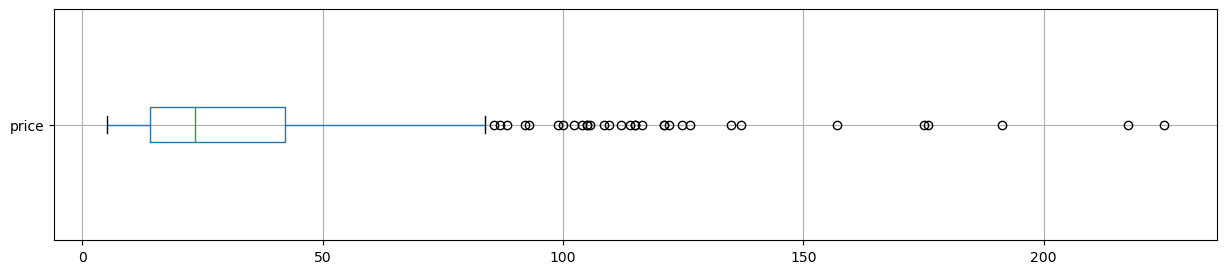

In [58]:
figure = plt.figure(figsize = (15, 3))
data.boxplot(column='price', vert=False)
plt.show()

#### Toutes les valeurs aberrantes sont représentées par les ronds noirs, elles ne sont pas incluent dans la boîte à moustache. Elles représentent toutes les valeurs supèrieures à 84.3 euros, qui est la limite supérieure des outliers. On remarque ici que la médiane est plus proche au Q1, donc elle est asymètrique étalée vers les grandes valeurs. 